# Graph Based Segragation Index

Socio- Economic Data Retrived from:

http://www.ecuadorencifras.gob.ec/documentos/datos/Poblacion_y_Demografia/Censo_poblacion_y_vivienda_/bdd_nivel_manzana_censal/Spss/CPV2010M_SPSS_Azuay.zip

SPSS file processed in R. We use dwelling as our unit of analysis, all the data has been previously aggregated at this level

In [33]:
import multiplex_segregation as ms
from multiplex_segregation import np, pd, gpd, nx, ox
import glob
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import display, Markdown

## Configuration script

In [25]:
network_type = 'drive'                    #get walkable streets and paths (ignores directionality)
retain_all = False                       #retain all only largest connected component
crs_osm = {'init':'epsg:4326'}           #crs that osm uses
crs_utm = {'init':'epsg:32717'}          #crs that for the city of Cuenca in UTM
input_folder = 'input_data'              #the input urban areas shapefiles folder

urban_area = 'Sectores_EC.shp'
blocks = 'blocks.shp'                    #the input shapefile name for block geometry
busLine = 'bus_lines.shp'                #the input shapefile name for bus lines
busStop = 'bus_stops'                    #the input file for all bus stop shaspes
allFiles = glob.glob('{}/{}/*.shp'.format(input_folder, busStop)) #list of all bus stop shapes
tramLine = 'tram_lines.shp'              #the input shapefile name for tram lines
tramStop = 'tram_stops.shp'              #the input shapefile name for tram stops
icvIndex = 'blockICV.csv'    #the input csv for calculated ICV index

graphs_folder = 'output_data/graphs'     #output folder to save graphs
output_path = 'output_data'              #output folder to save the stats
output_img = 'output_data/img'           #output folder to save figures

### Read ShapeFiles and Reprojections

In [26]:
#import shapefile as geopandas dataframe
blocksGPD =  gpd.read_file('{}/{}'.format(input_folder, blocks))
busLineGPD = gpd.read_file('{}/{}'.format(input_folder, busLine))
tramLineGPD = gpd.read_file('{}/{}'.format(input_folder, tramLine))
tramStopGPD = gpd.read_file('{}/{}'.format(input_folder, tramStop))

busStop_list = []

for file_ in allFiles:
    lineNum = file_.split('linea_',1)[1].split('.')[0]
    df = gpd.read_file(file_)
    df['lineNum'] = int(lineNum)
    busStop_list.append(df)
busStopGPD = gpd.GeoDataFrame(pd.concat(busStop_list, ignore_index = True))

#import ICV index as pandas dataframe
icvIndexDf = pd.read_csv('{}/{}'.format(output_path, icvIndex), dtype = {
    'id_man': str,
    'Q1' : np.float64, 
    'Q2' : np.float64,
    'Q3' : np.float64,
    'Q4' : np.float64,
    'ICV': np.float64,
    'nDwelling' : np.int32, 
    'nPeople' : np.int32    
})

In [27]:
display(
    Markdown('**General Information**'),
    Markdown('&nbsp;&nbsp;&nbsp;&nbsp;Number of Blocks: ' + str(len(blocksGPD.index))),
    Markdown('&nbsp;&nbsp;&nbsp;&nbsp;Number of Blocks with ICV: ' + str(len(icvIndexDf))),
    Markdown('&nbsp;&nbsp;&nbsp;&nbsp;Number of Bus Lines: ' + str(len(busLineGPD.LINEA.unique()))),
    Markdown('&nbsp;&nbsp;&nbsp;&nbsp;Number of Bus Stops: ' + str(len(busStopGPD.index))),
    Markdown('&nbsp;&nbsp;&nbsp;&nbsp;Number of Tram Lines: ' + str(len(tramLineGPD.FID_.unique()))),
    Markdown('&nbsp;&nbsp;&nbsp;&nbsp;Number of Tram stops: ' + str(len(tramStopGPD.index)))
)

**General Information**

&nbsp;&nbsp;&nbsp;&nbsp;Number of Blocks: 3800

&nbsp;&nbsp;&nbsp;&nbsp;Number of Blocks with ICV: 3391

&nbsp;&nbsp;&nbsp;&nbsp;Number of Bus Lines: 29

&nbsp;&nbsp;&nbsp;&nbsp;Number of Bus Stops: 3037

&nbsp;&nbsp;&nbsp;&nbsp;Number of Tram Lines: 1

&nbsp;&nbsp;&nbsp;&nbsp;Number of Tram stops: 41

## Download street network

Blocks define urban area, alpha shape is used to draw a boundary around multiple unconnected block geometries

Calculating Boundary with alpha = 0.005


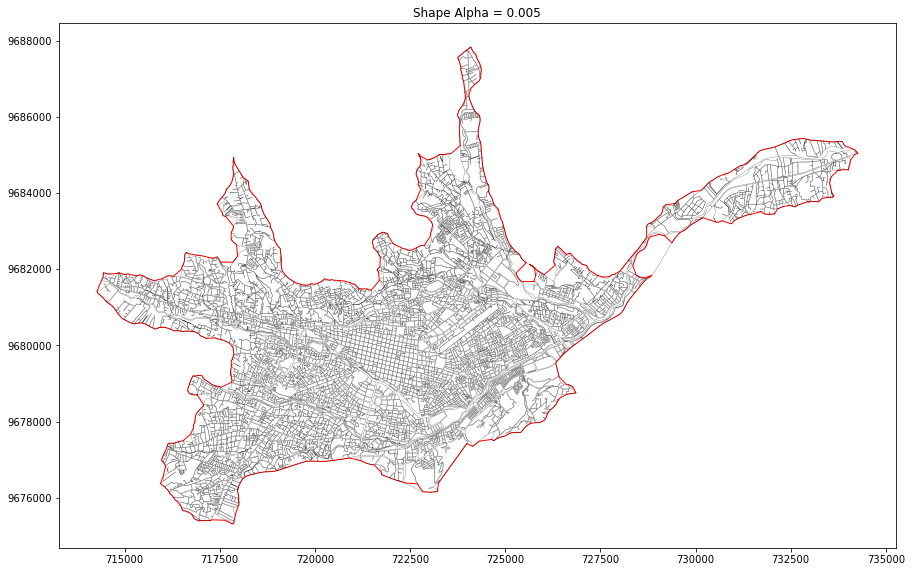

Calculating Boundary with alpha = 0.0045000000000000005


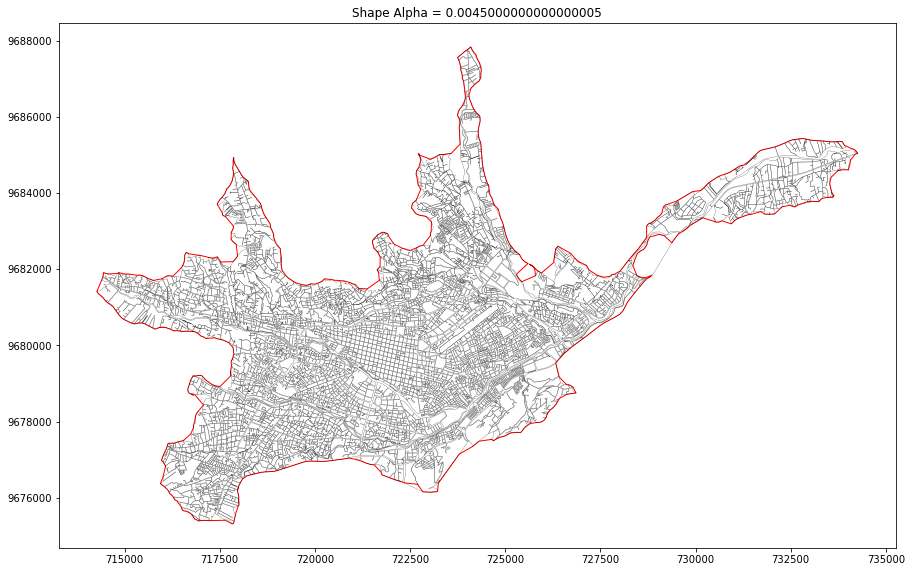

Calculating Boundary with alpha = 0.004


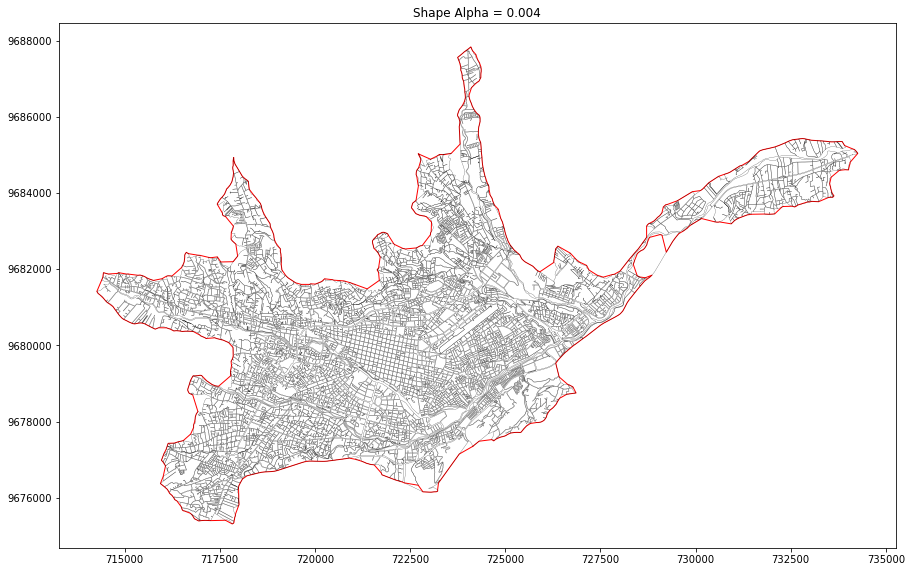

Calculating Boundary with alpha = 0.0035


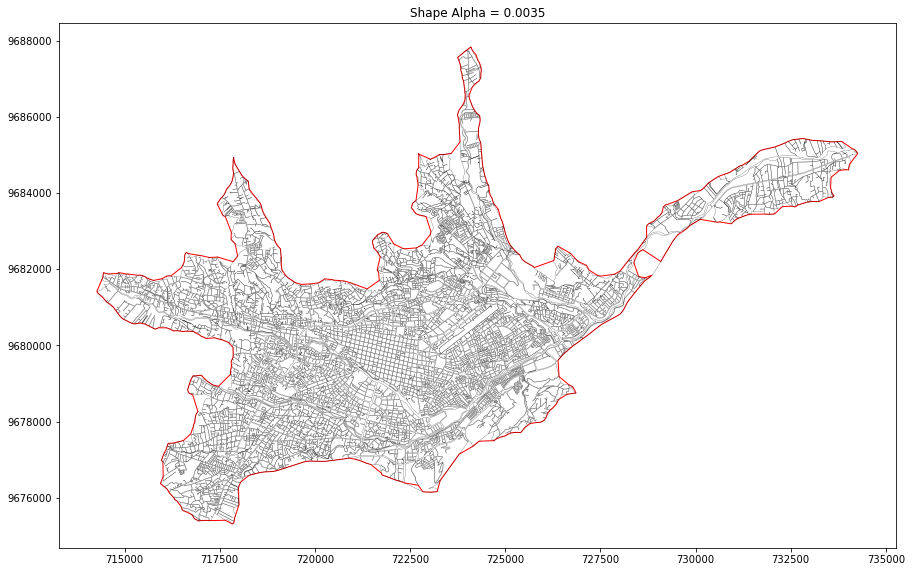

Calculating Boundary with alpha = 0.003


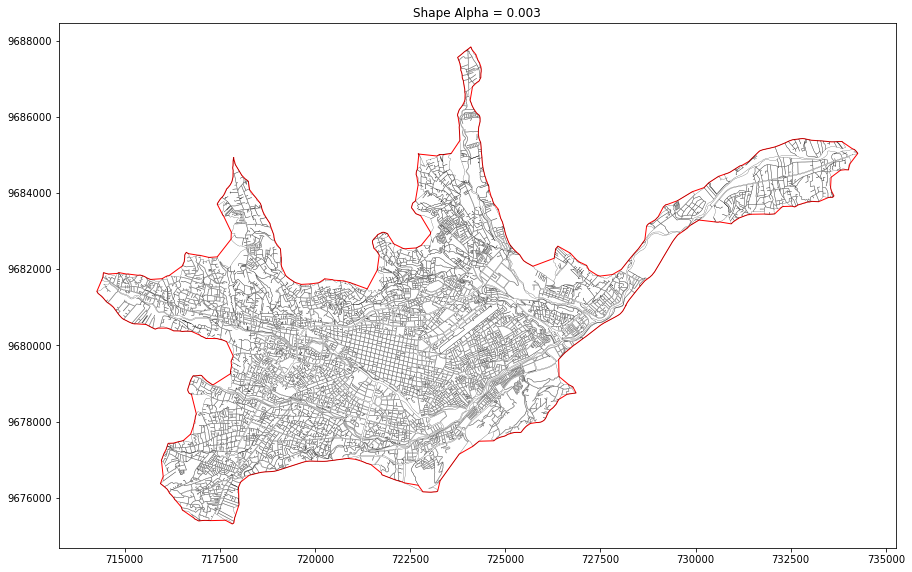

Calculating Boundary with alpha = 0.0025


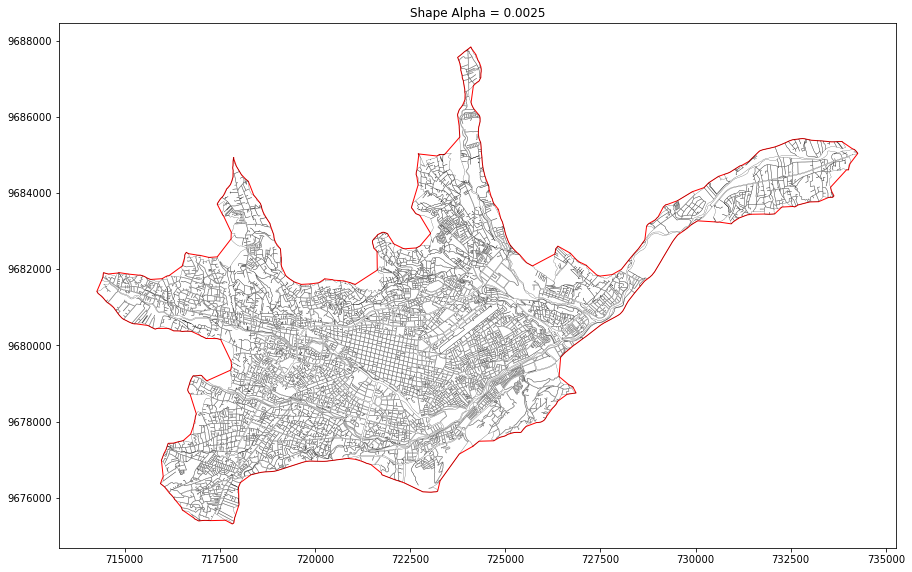

Calculating Boundary with alpha = 0.002


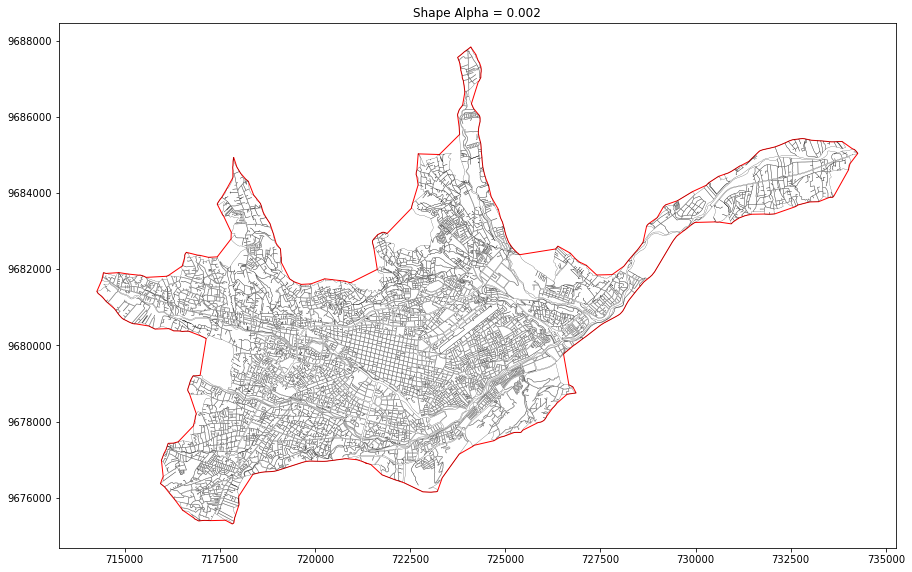

Calculating Boundary with alpha = 0.0015


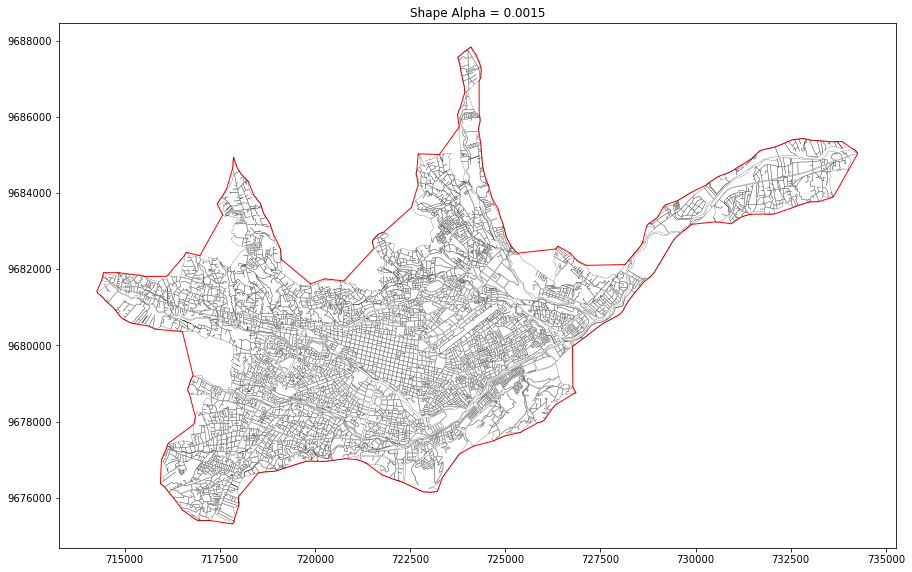

Calculating Boundary with alpha = 0.001


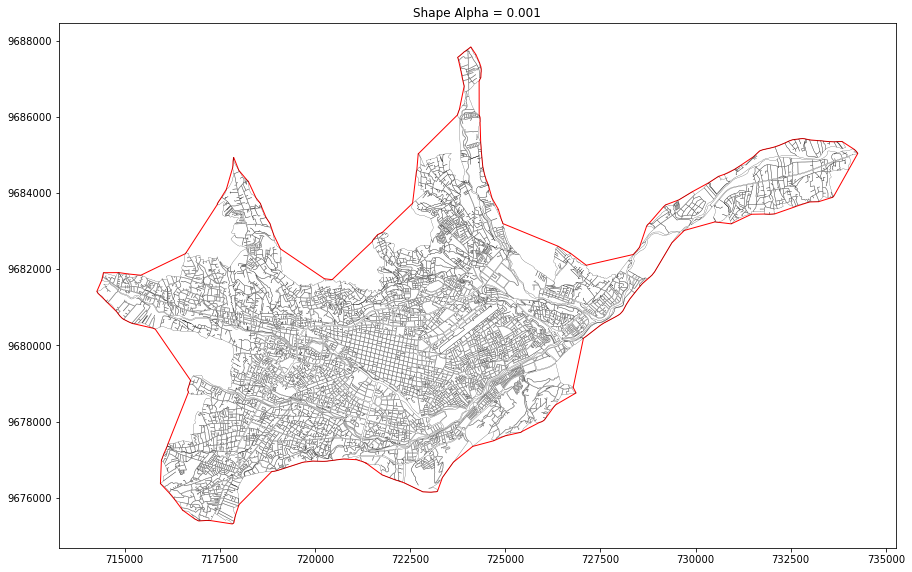

In [5]:
for i in range(4):
    alpha = 0.004 - (i*0.0005)
    temp = ms.boundary_from_areas(blocksGPD, alpha = alpha)
    base = temp.plot(color = 'white',edgecolor='red',linewidth=1, figsize = (15,10))
    base.set_title("Shape Alpha = {}".format(alpha))
    blocksGPD.plot(color = 'white',edgecolor='black',linewidth=0.2,  ax = base)
    plt.show()

## Create Street Network
create time weighted graph to represent the street network using Block Geometry, Alpha Value = 0.0025 and a walking speed = 5km/h

In [28]:
street_network, area = ms.construct_street_graph(blocksGPD,
                                                crs_osm, 
                                                crs_utm,
                                                alpha = 0.0025,
                                                buffer_dist=200,
                                                speed = 5
                                               )

Generating geometry
Calculating Boundary with alpha = 0.0025
Generating street graph


C:\Anaconda\lib\site-packages\osmnx\utils.py:268: RuntimeWarning: invalid value encountered in arccos
  arc = np.arccos(cos)


Reprojecting street graph


In [ ]:
#make undirected, while conserving multidigraph type
# G=street_graph_osm
# edges = []
# data_list = []
# for u, v, key, data in G.edges(keys=True, data=True):
#     if data['oneway']:
#         edges.append((v,u, data))
#         data_list.append(data)

# G.add_edges_from(edges)
    
data = pd.DataFrame.from_dict(G.edge)
data

#Save Road Network and Urban Area
# print('Saving street graph and Urban Area')
# ox.save_graph_shapefile(street_network, folder = graphs_folder, filename = '{}/shapefile'.format('street_network'))
# ox.save_graphml(street_network, folder = graphs_folder, filename = '{}/graph'.format('street_network'))
# area.to_file('{}/area'.format(output_path))

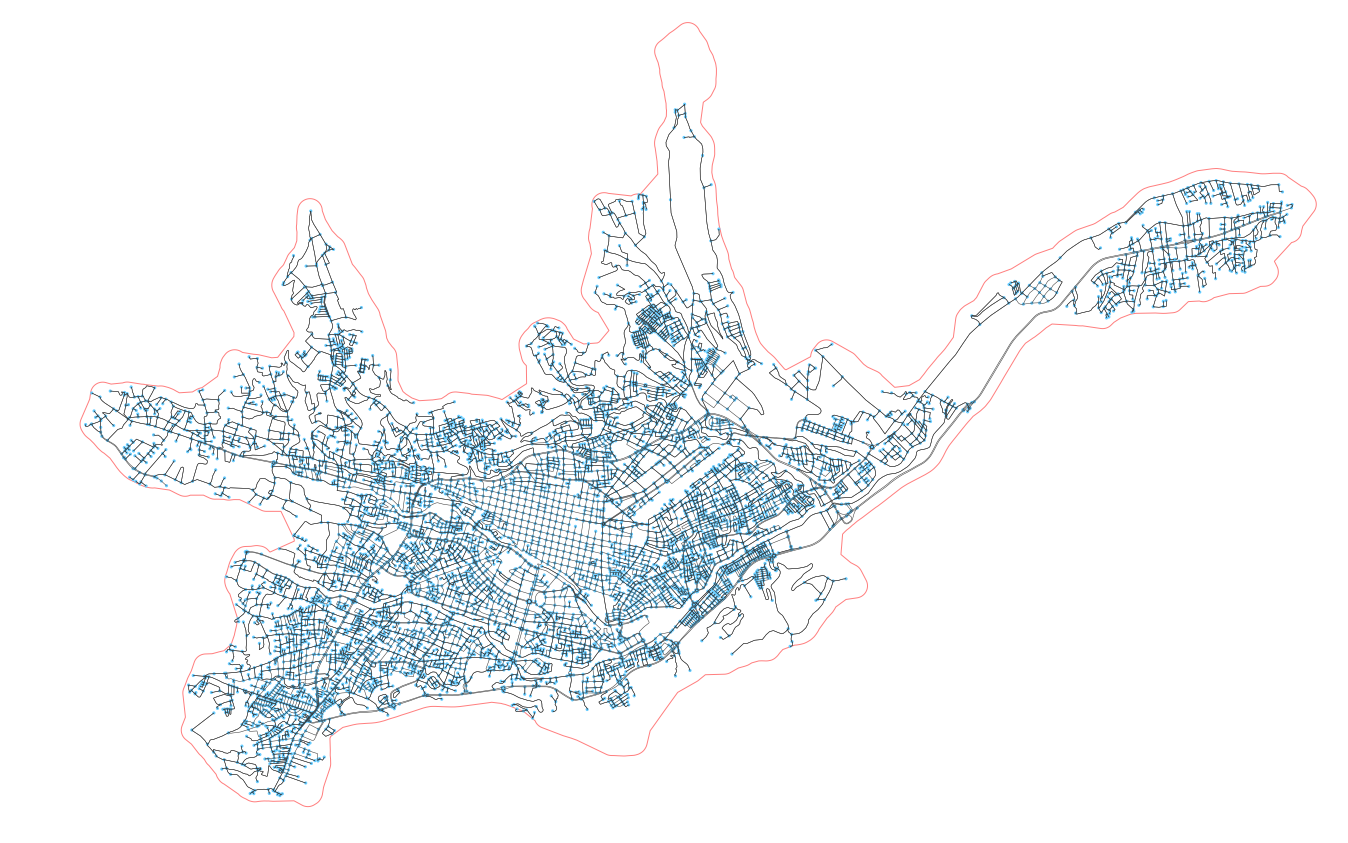

In [29]:
ms.plot_network(street_network, area)

## Get Road Network Stats

## Create Bus Network Graph

INFO:osmnx:Configured osmnx


plotting results for each line:


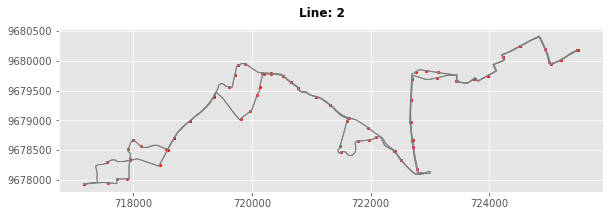

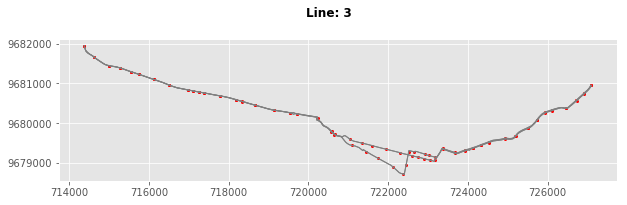

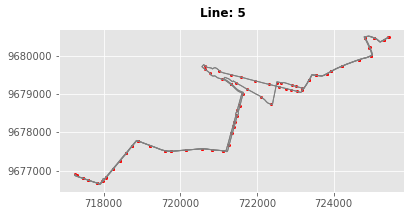

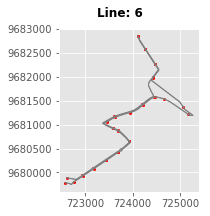

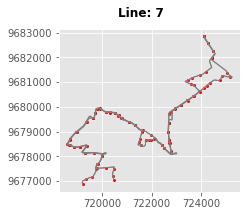

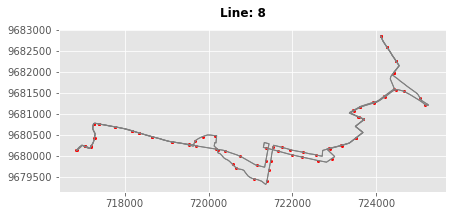

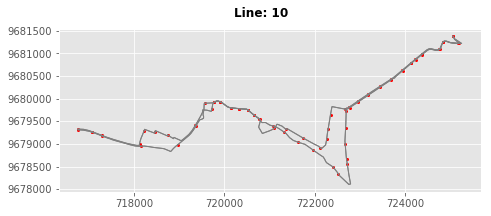

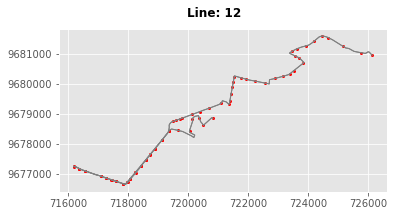

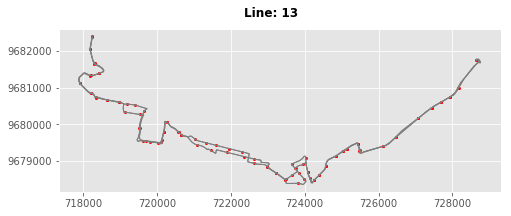

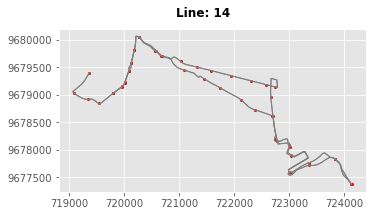

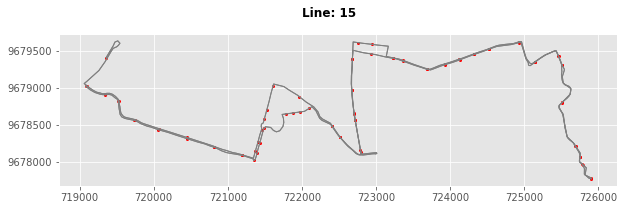

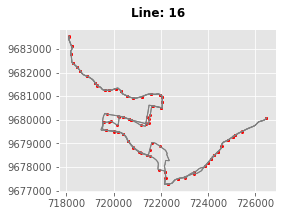

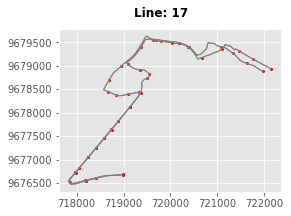

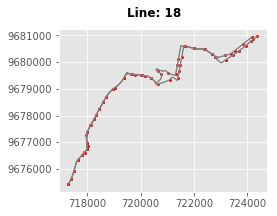

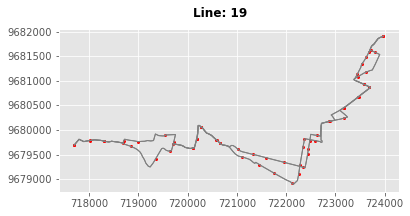

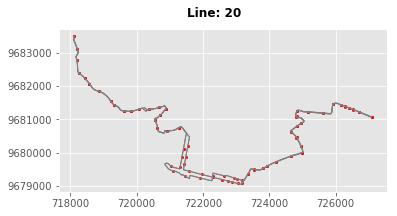

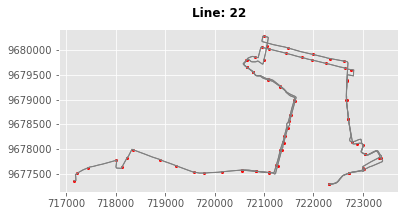

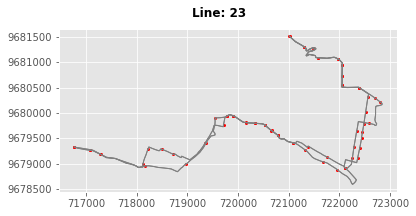

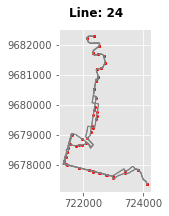

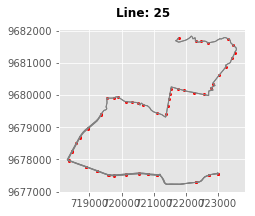

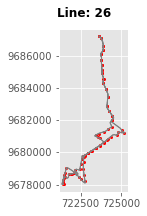

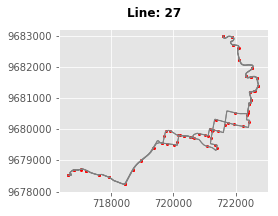

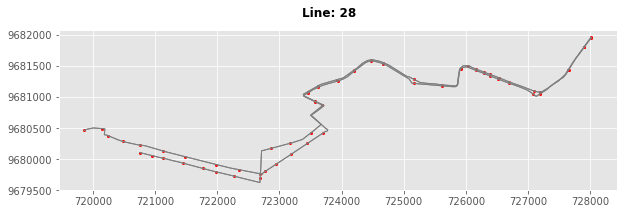

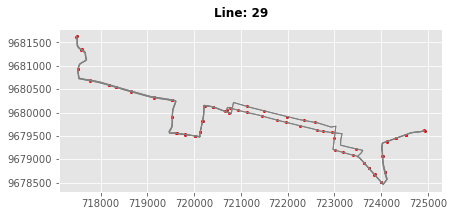

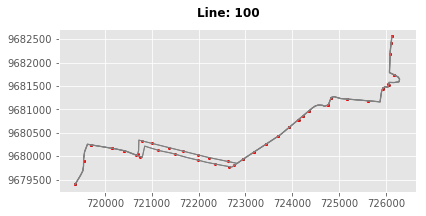

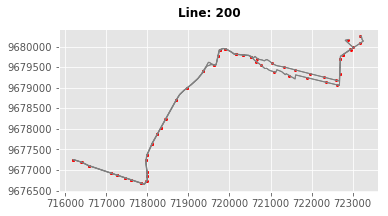

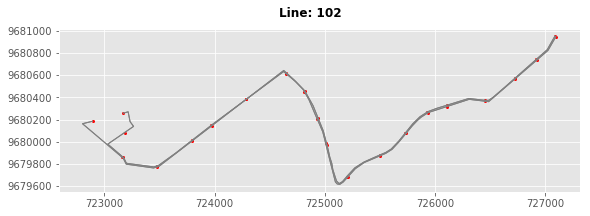

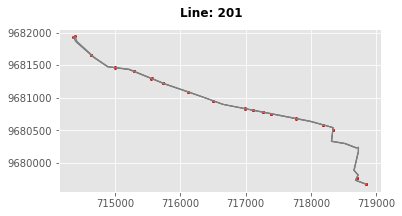

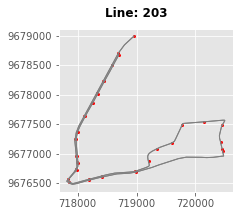

INFO:osmnx:Made undirected graph in 0.62 seconds
INFO:osmnx:Saved graph "bus" to disk as shapefiles at "output_data/graphs/bus_network/shapefile" in 9.88 seconds
INFO:osmnx:Saved graph "bus" to disk as GraphML at "output_data/graphs/bus_network/graph" in 2.82 seconds


In [44]:
importlib.reload(ms)
#create bus network
bus_network = ms.construct_bus_network(busLineGPD, busStopGPD, area, speed = 30)
type(bus_network)
#plot bus network graph
ox.save_graph_shapefile(bus_network, folder = graphs_folder, filename = '{}/shapefile'.format('bus_network'))
ox.save_graphml(bus_network, folder = graphs_folder, filename = '{}/graph'.format('bus_network'))

INFO:osmnx:Begin plotting the graph...
INFO:osmnx:Created GeoDataFrame "bus_edges" from graph in 0.96 seconds
INFO:osmnx:Drew the graph edges in 0.35 seconds


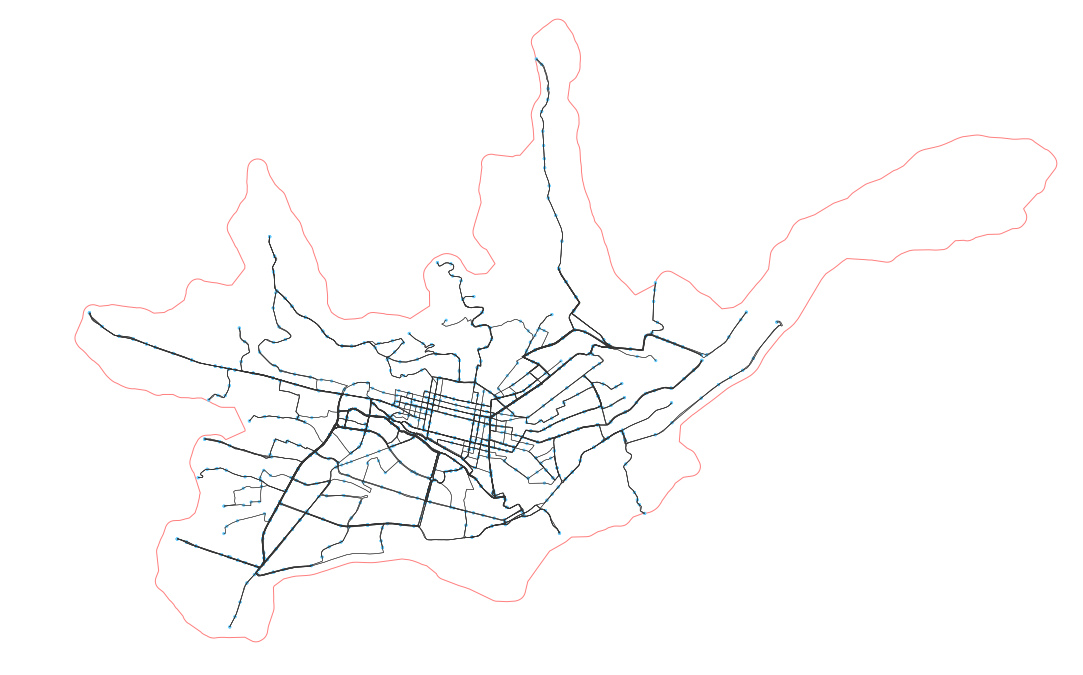

In [46]:
ms.plot_network(bus_network, area)

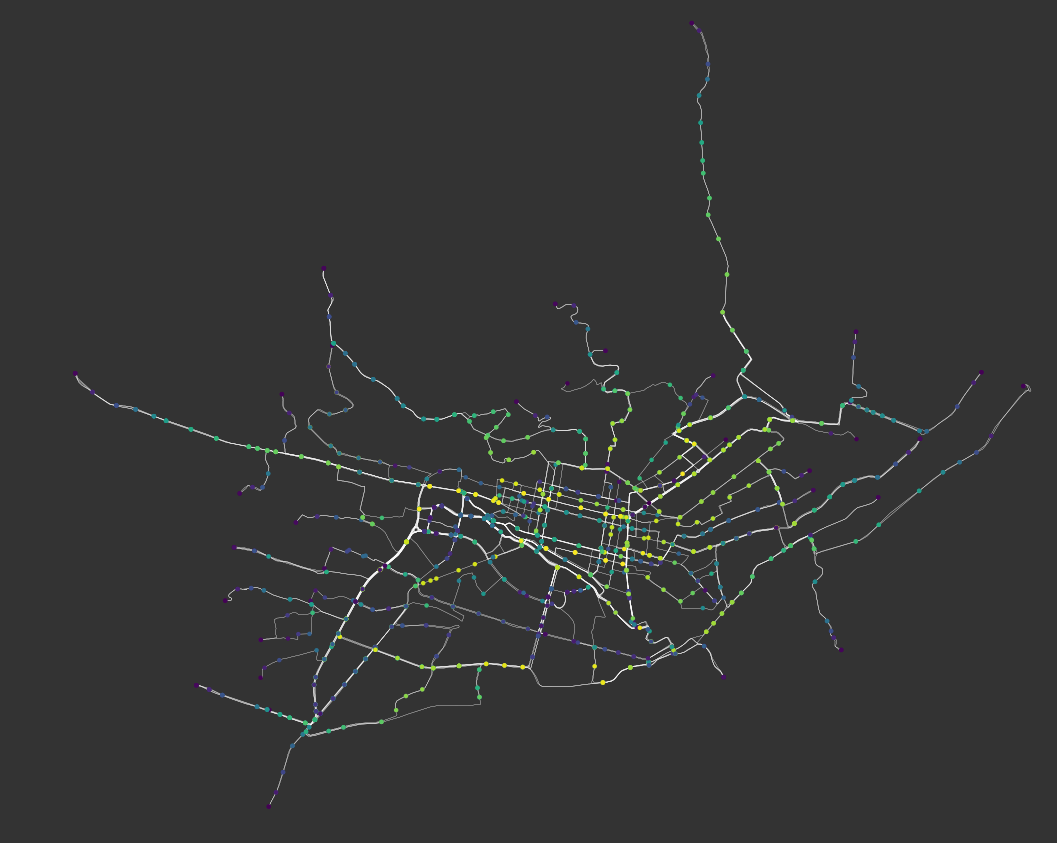

In [325]:
bcw = nx.betweenness_centrality(bus_network, weight= 'weight')
nc = get_node_colors_by_stat(bus_network, data=bcw)
fig, ax = ox.plot_graph(bus_network,
                        fig_height = 15,
                        node_size = 20,
                        node_color = nc,
                        node_zorder=2,
                        edge_color='w',
                        edge_linewidth=0.2,
                        edge_alpha=1,
                        bgcolor = '#333333',
                        save = True, 
                        show = True,
                        close = True,
                        filename = 'bus_stats_{}'.format('bc'), 
                        dpi=1200,
                        equal_aspect=True,
                       )

## Create Tram Network Graph

In [326]:
def clean_lines_tram(tramLineGPD):
    """
    Make geodataframe of lines that contains only single line strings
    and make lineString Z into linestring
    """
    lines_list = []
    for i, tram_line in tramLineGPD.iterrows():
        line = tram_line.geometry
        #check if line is multilinestring to store as multiple singlelinesstrings
        if isinstance(line, geometry.MultiLineString):
            lgeos = line.geoms
            lines = []
            for tl in lgeos:
                tlines = []
                if tl.length > 20 and tl.coords[0] != tl.coords[-1]:
                    coord = list(tl.coords)
                    for j in range(len(coord)):
                        point = coord[j][0:2]
                        tlines.append(point)
                    lines.append(coord)
            #choose first line and look for continuation
            lineCoord = lines[0]
            lineList = lines[1:]
            lineJoin = join_lines(lineCoord, lineList)
            lineJoin = join_lines(list(reversed(lineJoin)), lineList)
            tlines = geometry.LineString(coor for coor in lineJoin)
            linesGPD = gpd.GeoDataFrame({'way': [tram_line.Layer],
                                         'geometry': [tlines],
                                         'ngeom': [1],
                                       })
        else:
            line_list = []
            coord = list(line.coords)
            for j in range(len(coord)):
                point = coord[j][0:2]
                line_list.append(point)
            line = geometry.LineString(coor for coor in line_list)                
            linesGPD = gpd.GeoDataFrame({'way': [tram_line.Layer],
                                         'geometry': [line],
                                         'ngeom': [1]
                                       })

        lines_list.append(linesGPD)
    res = gpd.GeoDataFrame(pd.concat(lines_list, ignore_index=True))
    return res    

def snap_stops_to_lines_tram(tramLine, tramStops, tolerance = 50):
    """
    Snaps points to lines based on tolerance distance
    """
    stop_list = []

        #snap points to line
    for i, tram_line in tramLine.iterrows():
        line = tram_line.geometry

        #get only points within buffer and inside area
        line_buff = line.buffer(tolerance)
        stops = tramStops[tramStops.intersects(line_buff)]
        stops = stops[stops.intersects(area.geometry[0])]
        stops = clean_stops(stops, tolerance)
        points_snap = [line.project(stop) for stop in stops.geometry]
        snapped_points = [line.interpolate(point) for point in points_snap]
        pointsGPD = gpd.GeoDataFrame({'way': [tram_line.way for i in range(len(snapped_points))],
                                    'geometry': snapped_points,
                                    'ngeom': [tram_line.ngeom for i in range(len(snapped_points))],
                                    'lgth': points_snap,
                                    'x': [point.xy[0][0] for point in snapped_points],
                                    'y': [point.xy[1][0] for point in snapped_points]
                                       })
        stop_list.append(pointsGPD)
    res = gpd.GeoDataFrame(pd.concat(stop_list, ignore_index=True))
    #remove duplicates and na
    res = res.drop_duplicates(subset=['way', 'lgth', 'x', 'y'])
    res = res.dropna(how = 'all')
    #give unique id to points
    res['id']= [id_ for id_ in range(len(res))]
    return res
        
def create_tram_network(linesGPD, stopsGPD, speed = 40):
    """
    Create tram network from tram lines and tram stop geometries
    """
    linesGPD = clean_lines_tram(linesGPD)
    stopsGPD = snap_stops_to_lines_tram(linesGPD, stopsGPD)
    UJT = 1/(speed * 16.666666666667) #turn km/h to min/meter
    
    line_list = []

    #cut lines at points
    for i, tram_line in linesGPD.iterrows():
        line = tram_line.geometry
        stop_ = stopsGPD[stopsGPD.way == tram_line.way]
        stop_sorted = stop_.sort_values(by = "lgth").reset_index()
        if len(stop_sorted) is not 0:
            for point in range(len(stop_sorted)-1):
                pId = stop_sorted.id[point]
                pId2 = stop_sorted.id[point+1]
                dist1 = stop_sorted.lgth[point]
                dist2 = stop_sorted.lgth[point+1]
                lgth = dist2 - dist1
                cut1 = cut(line, dist1)
                if len(cut1) > 1:
                    tLine = cut1[1]
                else:
                    tLine = cut1[0]
                cut2 = cut(tLine, lgth)[0]
                #only save if line starts and ends on stops
                if (stop_sorted.geometry[point].distance(geometry.Point(cut2.coords[0]))<1) and (stop_sorted.geometry[point+1].distance(geometry.Point(cut2.coords[-1]))<1):
                    edgeGPD = gpd.GeoDataFrame({'way': [tram_line.way],
                                                'geometry': [cut2],
                                                'ngeom': [tram_line.ngeom],
                                                'lgth': [lgth],
                                                'u': [pId],
                                                'v': [pId2],
                                                'from': [cut2.coords[0]],
                                                'to': [cut2.coords[-1]],
                                                'weight': [lgth*UJT]
                                               })
                    line_list.append(edgeGPD)
    edge_list = gpd.GeoDataFrame(pd.concat(line_list, ignore_index=True))
    edge_list['key'] = [i for i in range(len(edge_list))]
    edge_list['osmid'] = [i for i in range(len(edge_list))]
    node_list = stopsGPD
    node_list['osmid'] = [i for i in range(len(node_list))]
    node_list.gdf_name = 'Nodes_list'
    for way in linesGPD.way.unique():
        plt.style.use('ggplot')
        fig, ax = plt.subplots(figsize = (10,3))
        fig.suptitle('Tram Line: {}'.format(way), fontsize=12, fontweight='bold')
        ax.set_aspect("equal")
        stopsGPD[stopsGPD.way==way].plot(ax=ax, color = 'red')
        edge_list[edge_list.way==way].plot(ax=ax, color = 'grey')
        plt.show()
    
    #create network
    G = ox.gdfs_to_graph(node_list, edge_list)
    G = create_transfers(G, weight = 10)
    G.name = 'tram'
    return(G)

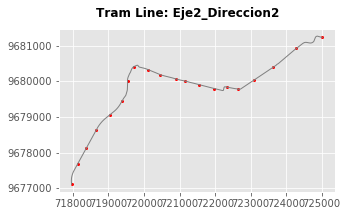

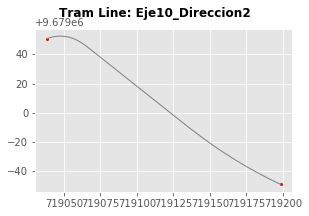

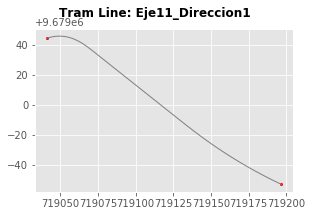

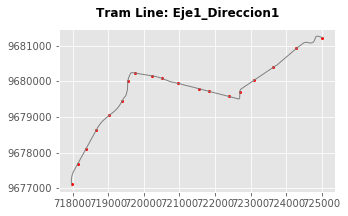

In [327]:
tram_network = create_tram_network(tramLineGPD, tramStopGPD)
#plot bus network graph
ox.save_graph_shapefile(tram_network, folder = graphs_folder, filename = '{}/shapefile'.format('tram_network'))
ox.save_graphml(tram_network, folder = graphs_folder, filename = '{}/graph'.format('tram_network'))

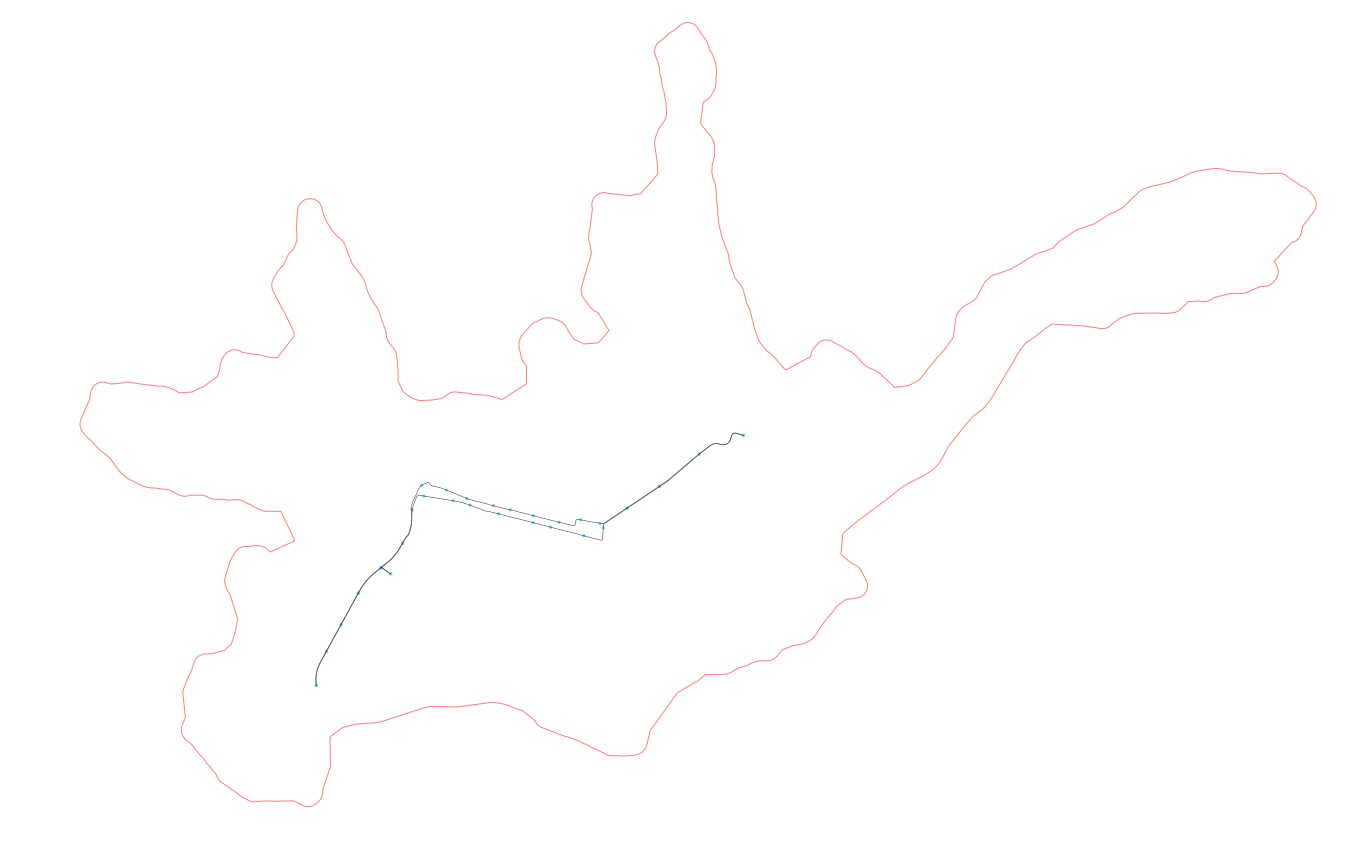

In [328]:
# plot_network(street_network, area)
# plot_network(bus_network, area)
plot_network(tram_network, area)

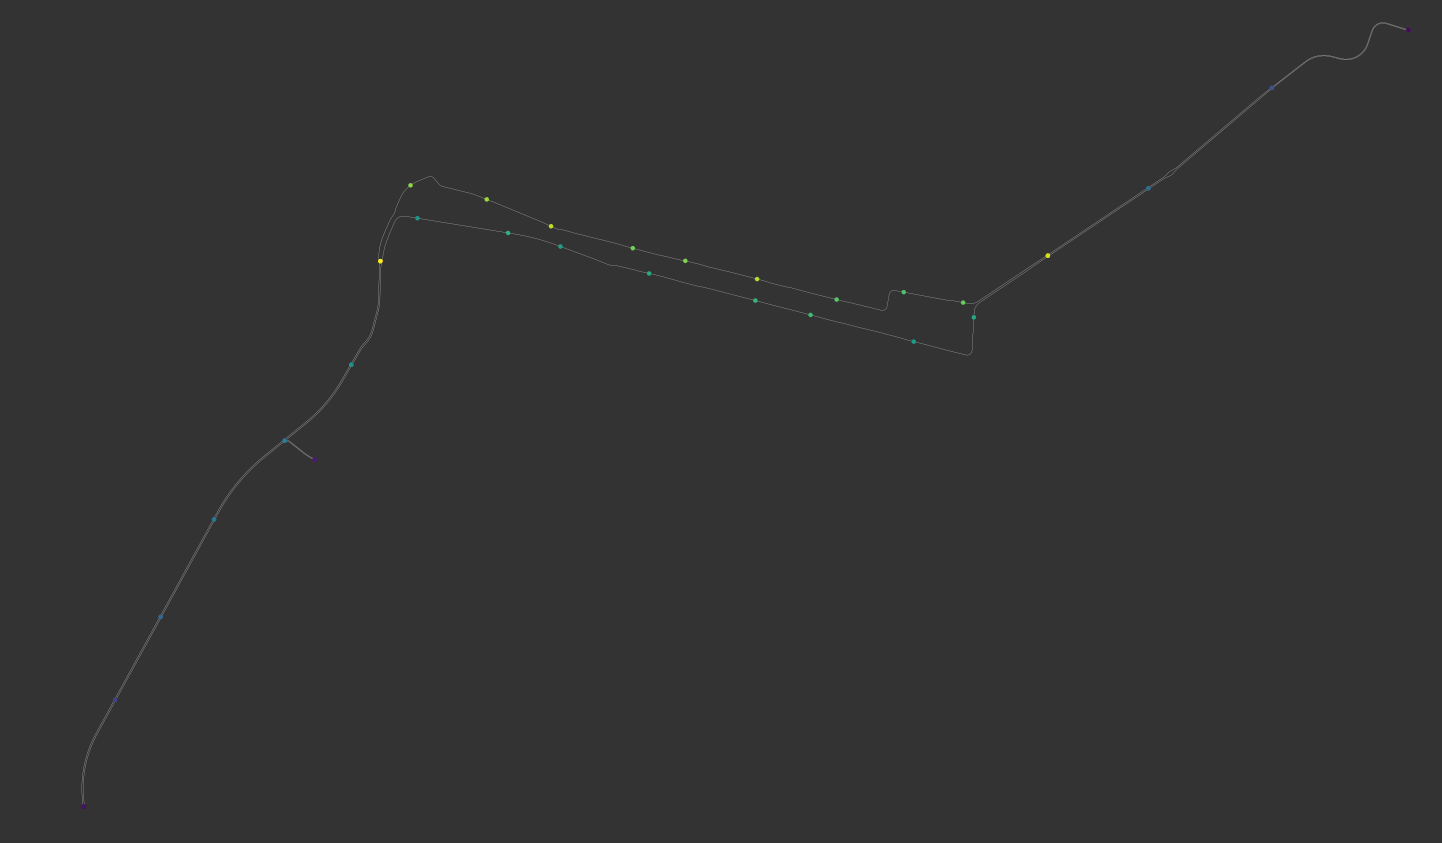

In [330]:
bcw = nx.betweenness_centrality(tram_network, weight= 'weight')
nc = get_node_colors_by_stat(tram_network, data=bcw)
fig, ax = ox.plot_graph(tram_network,
                        fig_height = 15,
                        node_size = 20,
                        node_color = nc,
                        node_zorder=2,
                        edge_color='w',
                        edge_linewidth=0.2,
                        edge_alpha=1,
                        bgcolor = '#333333',
                        save = True, 
                        show = True,
                        close = True,
                        filename = 'tram_stats_{}'.format('bc'), 
                        dpi=1200,
                        equal_aspect=True,
                       )

## Assign Socio Economic Data to Nodes

voronoi tesselation and weighted area overlay interpolation is used to determine population data at each intersection.

In [30]:
#join ICV dataframe to block geometry
blocksICV = blocksGPD.merge(icvIndexDf, left_on = 'DPA_MANZAN', right_on = 'id_man')

#only conserve valid geometries with values
blocksICV = blocksICV[blocksICV.is_valid]
blocksICV = blocksICV.dropna()
blocksICV.to_file('{}/blocksICV'.format(output_path))

Ring Self-intersection at or near point 720396.05939999968 9681490.2802000009


INFO:osmnx:Configured osmnx


creating voronoi tesselation...


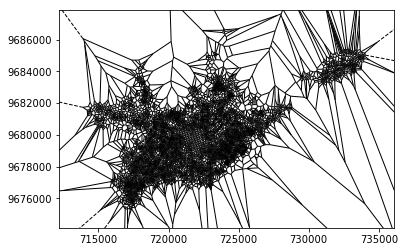

creating geodataframe...


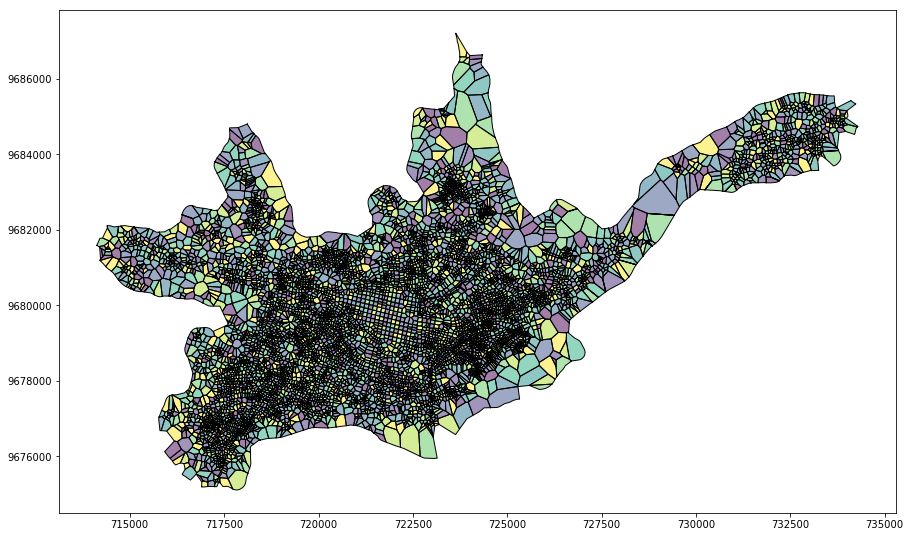

calculating area overlay
Calculating values for polygon...
appending values to geometry


NameError: name 'crs_utm' is not defined

In [39]:
import importlib
importlib.reload(ms)
#map data to intersection
street_network = ms.blocks_to_nodes(street_network, 
                                   blocksICV, 
                                   area, 
                                   crs_utm)
#save to shapefile and graphml
ox.save_graph_shapefile(street_network, folder = graphs_folder, filename = '{}/shapefileICV'.format('street_network'))

## Create Multiplex

### find nearest street node and integrate networks

In [ ]:
#create helped function
def find_nearest_node(tn, sn):
    """ 
    Given two networks find nearest nodes in target network for
    all nodes in source network
    
    parameters:
        tn : target network
        sn : source network
    returns:
        pandas.series: index of all records in tn that are nearest sn
    """
    
def integrate_network(street_network, transport_networks, waiting_times):
    """
    Create a multiplex based on different transport networks
    
    parameters:
        street_network: street graph (networkx graph object)
        transport_networks: dictionary containing transport network graphs (networkx graph object)
        waiting_times: dictionary containing waiting times between transport_networks and street_network
        
    returns:
        integrated_network: networkx.MultiDiGraph
    """
    
    

In [332]:
display(
type(street_network),
type(bus_network),
type(tram_network))

networkx.classes.multidigraph.MultiDiGraph

networkx.classes.multidigraph.MultiDiGraph

networkx.classes.multidigraph.MultiDiGraph

## Random Walk Segregation Index